# Postprocess locations from DLC and a video

In [1]:
import h5py
import os
import matplotlib.pyplot as plt

from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
import cv2
import torch
import tifffile

from ipywidgets import interact, interactive, fixed, interact_manual
from dNMF.Demix.dNMF import dNMF
import time
import scipy.io as scio
from sklearn.decomposition import FastICA

## BEFORE ANYTHING: move the gcamp video to the project folder!

## First, read the locations from DLC

In [2]:
which_neuron = 1; # Not sure which neurons are which

In [3]:
# Get the video folder, then the annotation
project_folder = r'C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\DLC_Projects\wbfm_3d-Charlie-2020-11-02'
bigtiff_folder = r'D:\More-stabilized-wbfm'

annotation_fname = r'videos\test2020-10-22_mcherry_fr1000_sl10_15DLC_resnet50_wbfm_3dNov2shuffle1_200000.h5'
annotation_fname = os.path.join(project_folder, annotation_fname)

# Will get traces from two videos:
btf_fname_mcherry = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_mcherry = os.path.join(bigtiff_folder, btf_fname_mcherry)
btf_fname_gcamp = r'test2020-10-22_16-15-20_test4-channel-1-pco_camera2\test2020-10-22_16-15-20_test4-channel-1-pco_camera2bigtiff.btf'
btf_fname_gcamp = os.path.join(bigtiff_folder, btf_fname_gcamp)

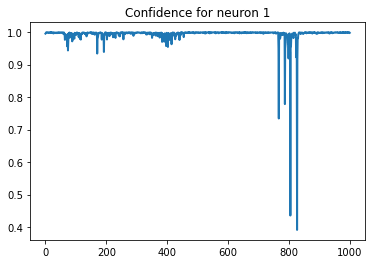

In [4]:
# Get the positions from the annotation: ONE neuron
this_xy, this_prob = xy_from_dlc_dat(annotation_fname, which_neuron=which_neuron, num_frames=1000)

plt.plot(this_prob, lw=2)
# plt.ylim([0,1])
plt.title(f'Confidence for neuron {which_neuron}');

## Second, get a moving 3d crop centering this neuron

In [5]:
# Use video from above

num_frames = 100
sz= (25,25, 9)
which_z = 12
alpha = 0.15
start_volume = 100

In [12]:
cropped_dat_mcherry = get_crop_from_ometiff_virtual(btf_fname_mcherry, 
                                                    this_xy, which_z, 
                                                    num_frames, 
                                                    crop_sz=sz,
                                                    num_slices=33,
                                                    actually_create=True,
                                                    alpha=alpha,
                                                    start_volume=start_volume,
                                                    actually_crop=True)
cropped_dat_gcamp = get_crop_from_ometiff_virtual(btf_fname_gcamp, 
                                                  this_xy, which_z, 
                                                  num_frames,
                                                  crop_sz=sz,
                                                  num_slices=33,
                                                  actually_create=True,
                                                  flip_x=True,
                                                  alpha=alpha,
                                                  start_volume=start_volume,
                                                  actually_crop=True)

Cropping 9 slices, starting at 7
Full size read as (700, 900)
Page 3307/3300; volume 0/100 to cropped array slice 0
Page 3308/3300; volume 0/100 to cropped array slice 1
Page 3309/3300; volume 0/100 to cropped array slice 2
Page 3310/3300; volume 0/100 to cropped array slice 3
Page 3311/3300; volume 0/100 to cropped array slice 4
Page 3312/3300; volume 0/100 to cropped array slice 5
Page 3313/3300; volume 0/100 to cropped array slice 6
Page 3314/3300; volume 0/100 to cropped array slice 7
Page 3315/3300; volume 0/100 to cropped array slice 8
Page 3340/3300; volume 1/100 to cropped array slice 0
Page 3341/3300; volume 1/100 to cropped array slice 1
Page 3342/3300; volume 1/100 to cropped array slice 2
Page 3343/3300; volume 1/100 to cropped array slice 3
Page 3344/3300; volume 1/100 to cropped array slice 4
Page 3345/3300; volume 1/100 to cropped array slice 5
Page 3346/3300; volume 1/100 to cropped array slice 6
Page 3347/3300; volume 1/100 to cropped array slice 7
Page 3348/3300; volu

Page 3868/3300; volume 17/100 to cropped array slice 0
Page 3869/3300; volume 17/100 to cropped array slice 1
Page 3870/3300; volume 17/100 to cropped array slice 2
Page 3871/3300; volume 17/100 to cropped array slice 3
Page 3872/3300; volume 17/100 to cropped array slice 4
Page 3873/3300; volume 17/100 to cropped array slice 5
Page 3874/3300; volume 17/100 to cropped array slice 6
Page 3875/3300; volume 17/100 to cropped array slice 7
Page 3876/3300; volume 17/100 to cropped array slice 8
Page 3901/3300; volume 18/100 to cropped array slice 0
Page 3902/3300; volume 18/100 to cropped array slice 1
Page 3903/3300; volume 18/100 to cropped array slice 2
Page 3904/3300; volume 18/100 to cropped array slice 3
Page 3905/3300; volume 18/100 to cropped array slice 4
Page 3906/3300; volume 18/100 to cropped array slice 5
Page 3907/3300; volume 18/100 to cropped array slice 6
Page 3908/3300; volume 18/100 to cropped array slice 7
Page 3909/3300; volume 18/100 to cropped array slice 8
Page 3934/

Page 4531/3300; volume 37/100 to cropped array slice 3
Page 4532/3300; volume 37/100 to cropped array slice 4
Page 4533/3300; volume 37/100 to cropped array slice 5
Page 4534/3300; volume 37/100 to cropped array slice 6
Page 4535/3300; volume 37/100 to cropped array slice 7
Page 4536/3300; volume 37/100 to cropped array slice 8
Page 4561/3300; volume 38/100 to cropped array slice 0
Page 4562/3300; volume 38/100 to cropped array slice 1
Page 4563/3300; volume 38/100 to cropped array slice 2
Page 4564/3300; volume 38/100 to cropped array slice 3
Page 4565/3300; volume 38/100 to cropped array slice 4
Page 4566/3300; volume 38/100 to cropped array slice 5
Page 4567/3300; volume 38/100 to cropped array slice 6
Page 4568/3300; volume 38/100 to cropped array slice 7
Page 4569/3300; volume 38/100 to cropped array slice 8
Page 4594/3300; volume 39/100 to cropped array slice 0
Page 4595/3300; volume 39/100 to cropped array slice 1
Page 4596/3300; volume 39/100 to cropped array slice 2
Page 4597/

Page 5221/3300; volume 58/100 to cropped array slice 0
Page 5222/3300; volume 58/100 to cropped array slice 1
Page 5223/3300; volume 58/100 to cropped array slice 2
Page 5224/3300; volume 58/100 to cropped array slice 3
Page 5225/3300; volume 58/100 to cropped array slice 4
Page 5226/3300; volume 58/100 to cropped array slice 5
Page 5227/3300; volume 58/100 to cropped array slice 6
Page 5228/3300; volume 58/100 to cropped array slice 7
Page 5229/3300; volume 58/100 to cropped array slice 8
Page 5254/3300; volume 59/100 to cropped array slice 0
Page 5255/3300; volume 59/100 to cropped array slice 1
Page 5256/3300; volume 59/100 to cropped array slice 2
Page 5257/3300; volume 59/100 to cropped array slice 3
Page 5258/3300; volume 59/100 to cropped array slice 4
Page 5259/3300; volume 59/100 to cropped array slice 5
Page 5260/3300; volume 59/100 to cropped array slice 6
Page 5261/3300; volume 59/100 to cropped array slice 7
Page 5262/3300; volume 59/100 to cropped array slice 8
Page 5287/

Page 5885/3300; volume 78/100 to cropped array slice 4
Page 5886/3300; volume 78/100 to cropped array slice 5
Page 5887/3300; volume 78/100 to cropped array slice 6
Page 5888/3300; volume 78/100 to cropped array slice 7
Page 5889/3300; volume 78/100 to cropped array slice 8
Page 5914/3300; volume 79/100 to cropped array slice 0
Page 5915/3300; volume 79/100 to cropped array slice 1
Page 5916/3300; volume 79/100 to cropped array slice 2
Page 5917/3300; volume 79/100 to cropped array slice 3
Page 5918/3300; volume 79/100 to cropped array slice 4
Page 5919/3300; volume 79/100 to cropped array slice 5
Page 5920/3300; volume 79/100 to cropped array slice 6
Page 5921/3300; volume 79/100 to cropped array slice 7
Page 5922/3300; volume 79/100 to cropped array slice 8
Page 5947/3300; volume 80/100 to cropped array slice 0
Page 5948/3300; volume 80/100 to cropped array slice 1
Page 5949/3300; volume 80/100 to cropped array slice 2
Page 5950/3300; volume 80/100 to cropped array slice 3
Page 5951/

Page 6574/3300; volume 99/100 to cropped array slice 0
Page 6575/3300; volume 99/100 to cropped array slice 1
Page 6576/3300; volume 99/100 to cropped array slice 2
Page 6577/3300; volume 99/100 to cropped array slice 3
Page 6578/3300; volume 99/100 to cropped array slice 4
Page 6579/3300; volume 99/100 to cropped array slice 5
Page 6580/3300; volume 99/100 to cropped array slice 6
Page 6581/3300; volume 99/100 to cropped array slice 7
Page 6582/3300; volume 99/100 to cropped array slice 8
Cropping 9 slices, starting at 7
Full size read as (700, 900)
Page 3307/3300; volume 0/100 to cropped array slice 0
Page 3308/3300; volume 0/100 to cropped array slice 1
Page 3309/3300; volume 0/100 to cropped array slice 2
Page 3310/3300; volume 0/100 to cropped array slice 3
Page 3311/3300; volume 0/100 to cropped array slice 4
Page 3312/3300; volume 0/100 to cropped array slice 5
Page 3313/3300; volume 0/100 to cropped array slice 6
Page 3314/3300; volume 0/100 to cropped array slice 7
Page 3315/3

Page 3808/3300; volume 15/100 to cropped array slice 6
Page 3809/3300; volume 15/100 to cropped array slice 7
Page 3810/3300; volume 15/100 to cropped array slice 8
Page 3835/3300; volume 16/100 to cropped array slice 0
Page 3836/3300; volume 16/100 to cropped array slice 1
Page 3837/3300; volume 16/100 to cropped array slice 2
Page 3838/3300; volume 16/100 to cropped array slice 3
Page 3839/3300; volume 16/100 to cropped array slice 4
Page 3840/3300; volume 16/100 to cropped array slice 5
Page 3841/3300; volume 16/100 to cropped array slice 6
Page 3842/3300; volume 16/100 to cropped array slice 7
Page 3843/3300; volume 16/100 to cropped array slice 8
Page 3868/3300; volume 17/100 to cropped array slice 0
Page 3869/3300; volume 17/100 to cropped array slice 1
Page 3870/3300; volume 17/100 to cropped array slice 2
Page 3871/3300; volume 17/100 to cropped array slice 3
Page 3872/3300; volume 17/100 to cropped array slice 4
Page 3873/3300; volume 17/100 to cropped array slice 5
Page 3874/

Page 4496/3300; volume 36/100 to cropped array slice 1
Page 4497/3300; volume 36/100 to cropped array slice 2
Page 4498/3300; volume 36/100 to cropped array slice 3
Page 4499/3300; volume 36/100 to cropped array slice 4
Page 4500/3300; volume 36/100 to cropped array slice 5
Page 4501/3300; volume 36/100 to cropped array slice 6
Page 4502/3300; volume 36/100 to cropped array slice 7
Page 4503/3300; volume 36/100 to cropped array slice 8
Page 4528/3300; volume 37/100 to cropped array slice 0
Page 4529/3300; volume 37/100 to cropped array slice 1
Page 4530/3300; volume 37/100 to cropped array slice 2
Page 4531/3300; volume 37/100 to cropped array slice 3
Page 4532/3300; volume 37/100 to cropped array slice 4
Page 4533/3300; volume 37/100 to cropped array slice 5
Page 4534/3300; volume 37/100 to cropped array slice 6
Page 4535/3300; volume 37/100 to cropped array slice 7
Page 4536/3300; volume 37/100 to cropped array slice 8
Page 4561/3300; volume 38/100 to cropped array slice 0
Page 4562/

Page 5030/3300; volume 52/100 to cropped array slice 7
Page 5031/3300; volume 52/100 to cropped array slice 8
Page 5056/3300; volume 53/100 to cropped array slice 0
Page 5057/3300; volume 53/100 to cropped array slice 1
Page 5058/3300; volume 53/100 to cropped array slice 2
Page 5059/3300; volume 53/100 to cropped array slice 3
Page 5060/3300; volume 53/100 to cropped array slice 4
Page 5061/3300; volume 53/100 to cropped array slice 5
Page 5062/3300; volume 53/100 to cropped array slice 6
Page 5063/3300; volume 53/100 to cropped array slice 7
Page 5064/3300; volume 53/100 to cropped array slice 8
Page 5089/3300; volume 54/100 to cropped array slice 0
Page 5090/3300; volume 54/100 to cropped array slice 1
Page 5091/3300; volume 54/100 to cropped array slice 2
Page 5092/3300; volume 54/100 to cropped array slice 3
Page 5093/3300; volume 54/100 to cropped array slice 4
Page 5094/3300; volume 54/100 to cropped array slice 5
Page 5095/3300; volume 54/100 to cropped array slice 6
Page 5096/

Page 5716/3300; volume 73/100 to cropped array slice 0
Page 5717/3300; volume 73/100 to cropped array slice 1
Page 5718/3300; volume 73/100 to cropped array slice 2
Page 5719/3300; volume 73/100 to cropped array slice 3
Page 5720/3300; volume 73/100 to cropped array slice 4
Page 5721/3300; volume 73/100 to cropped array slice 5
Page 5722/3300; volume 73/100 to cropped array slice 6
Page 5723/3300; volume 73/100 to cropped array slice 7
Page 5724/3300; volume 73/100 to cropped array slice 8
Page 5749/3300; volume 74/100 to cropped array slice 0
Page 5750/3300; volume 74/100 to cropped array slice 1
Page 5751/3300; volume 74/100 to cropped array slice 2
Page 5752/3300; volume 74/100 to cropped array slice 3
Page 5753/3300; volume 74/100 to cropped array slice 4
Page 5754/3300; volume 74/100 to cropped array slice 5
Page 5755/3300; volume 74/100 to cropped array slice 6
Page 5756/3300; volume 74/100 to cropped array slice 7
Page 5757/3300; volume 74/100 to cropped array slice 8
Page 5782/

Page 6312/3300; volume 91/100 to cropped array slice 2
Page 6313/3300; volume 91/100 to cropped array slice 3
Page 6314/3300; volume 91/100 to cropped array slice 4
Page 6315/3300; volume 91/100 to cropped array slice 5
Page 6316/3300; volume 91/100 to cropped array slice 6
Page 6317/3300; volume 91/100 to cropped array slice 7
Page 6318/3300; volume 91/100 to cropped array slice 8
Page 6343/3300; volume 92/100 to cropped array slice 0
Page 6344/3300; volume 92/100 to cropped array slice 1
Page 6345/3300; volume 92/100 to cropped array slice 2
Page 6346/3300; volume 92/100 to cropped array slice 3
Page 6347/3300; volume 92/100 to cropped array slice 4
Page 6348/3300; volume 92/100 to cropped array slice 5
Page 6349/3300; volume 92/100 to cropped array slice 6
Page 6350/3300; volume 92/100 to cropped array slice 7
Page 6351/3300; volume 92/100 to cropped array slice 8
Page 6376/3300; volume 93/100 to cropped array slice 0
Page 6377/3300; volume 93/100 to cropped array slice 1
Page 6378/

In [13]:
def f(t,z): 
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(cropped_dat_mcherry[t,z,...]);
    plt.title('mcherry')
    plt.colorbar()
    plt.clim(0, 200)
    
    plt.subplot(122)
    plt.imshow(cropped_dat_gcamp[t,z,...]);
    plt.title('gcamp')
    plt.colorbar()
    plt.clim(0, 20)
interact(f, t=(0,num_frames-1), z=(0,sz[-1]-1));

interactive(children=(IntSlider(value=49, description='t', max=99), IntSlider(value=4, description='z', max=8)…

## Try 1: SLIC

In [14]:
from skimage import segmentation

In [62]:
# Get an example image
img = cropped_dat_mcherry[0,...]

result = segmentation.slic(img, multichannel=False, n_segments=10, sigma=0.5)
print(result.shape)

(9, 25, 25)


In [25]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(121)
    plt.imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.colorbar()
    #plt.title(f'mcherry Max = {ma')
    
    plt.subplot(122)
    plt.imshow(result[i,...])
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

## Try 2: Blob detection

In [231]:
which_t = 5
img = cropped_dat_mcherry[which_t,...]

In [232]:
# Alternative: watershed based on threshold
#from scipy.ndimage import watershed_ift, maximum_position
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)

In [233]:
opt = dict(max_sigma=10, min_sigma=4, exclude_border=0, threshold=0.0)
#blobs = [feature.blob_log(img[i,...], **opt) for i in range(img.shape[0])]
blobs = feature.blob_log(img, **opt)

In [234]:
blobs


array([[ 0.        , 24.        ,  0.        ,  4.66666667],
       [ 0.        , 16.        , 17.        ,  4.        ],
       [ 0.        , 10.        , 24.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  6.66666667]])

In [235]:
# Make segmentation using edge-detection and watershed.
%matplotlib inline
def f(i):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()
    
    
    #plt.subplot(121)
    ax[0].imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.title('mcherry')
    #plt.title(f'mcherry Max = {ma')
    
    ax[1].imshow(cropped_dat_gcamp[which_t,i,...])
    for blob in blobs:
        z, y, x, r = blob
        #if abs(z-i)<2:
        r = (r-abs(i-z))*np.sqrt(2)
        if r > 0:
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax[1].add_patch(c)
    plt.title('Gcamp')
    
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

## Try 3: Gradient-based watershed

Following:
https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

In [32]:
img = cropped_dat_mcherry[0,0,...]

(-0.5, 24.5, 24.5, -0.5)

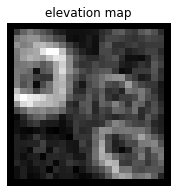

In [51]:
from skimage.filters import sobel
from skimage.color import label2rgb

elevation_map = sobel(img)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

(-0.5, 24.5, 24.5, -0.5)

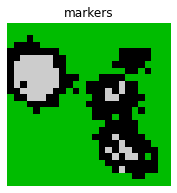

In [52]:
markers = np.zeros_like(img)
markers[img < 30] = 1
markers[img > 0.7*np.max(img)] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

(-0.5, 24.5, 24.5, -0.5)

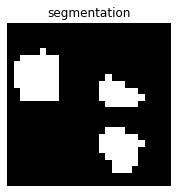

In [59]:
segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

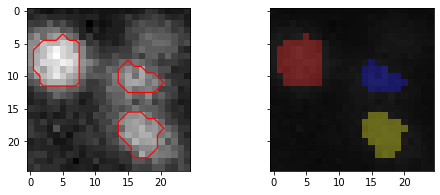

In [60]:
segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=img.astype('uint8'), bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay)

## Try 4: Distance-based watershed

Following:
https://scikit-image.org/docs/dev/auto_examples/applications/plot_human_mitosis.html

In [57]:
img = cropped_dat_mcherry[0,3,...]

In [60]:
thresh = filters.threshold_multiotsu(img, classes=3)

# Try a local threshold
#block_size = 35
#thresh = filters.threshold_local(img, block_size, offset=10)
cells = img > thresh[0]

#print(thresh)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(cells)

<IPython.core.display.Javascript object>


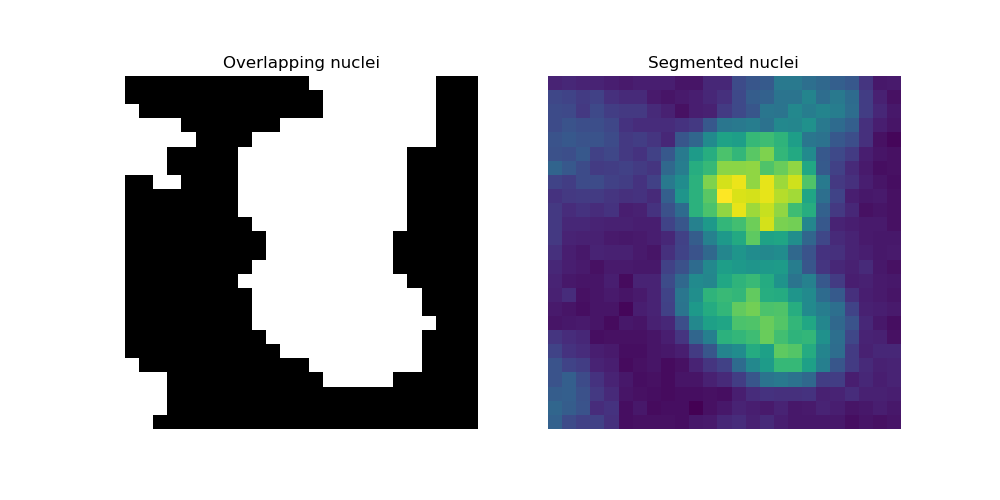

In [61]:
distance = ndi.distance_transform_edt(cells)

local_maxi = feature.peak_local_max(distance, indices=False,
                                    min_distance=3)

markers = measure.label(local_maxi)

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()

In [62]:
np.where(local_maxi)
plt.imshow(distance)
plt.show()

## Try 5: 3d watershed (I think)

In [56]:
img = cropped_dat_mcherry[0,...]

In [138]:
#img_laplace = ndi.gaussian_laplace(img, sigma=2)
img_laplace = ndi.gaussian_gradient_magnitude(img, sigma=1)
img_laplace = img_laplace - np.mean(img_laplace)

In [157]:
thresh = filters.threshold_otsu(img)
print(thresh)

cells = img > thresh

distance = ndi.distance_transform_edt(cells)


46.20703125


In [158]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(131)
    plt.imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.colorbar()
    #plt.title(f'mcherry Max = {ma')
    plt.title('Raw')
    
    plt.subplot(132)
    plt.imshow(img_laplace[i,...])
    plt.colorbar()
    plt.title('Laplacian or gradient')
    
    plt.subplot(133)
    plt.imshow(distance[i,...])
    plt.colorbar()
    plt.title('Distance')
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

In [161]:
#local_mini = feature.peak_local_max(-img_laplace, indices=False,
#                                    min_distance=1)
local_mini = feature.peak_local_max(distance, indices=False,
                                    min_distance=3)

markers = measure.label(local_mini)

#segmented_cells = segmentation.watershed(img_laplace, markers, mask=cells)
#segmented_cells = ndi.watershed_ift(img_laplace.astype('uint8'), markers)
segmented_cells = segmentation.watershed(-distance, markers, mask=cells)
print(np.where(local_mini))

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64), array([ 6,  6,  7,  7, 10, 10, 11, 12, 13, 13, 14, 14, 15, 15, 15, 16, 16,
       17, 17, 18], dtype=int64), array([11, 15, 10, 11, 14, 15, 14, 14, 13, 14, 13, 14, 11, 12, 13, 12, 13,
       12, 13, 13], dtype=int64))


In [162]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(131)
    plt.imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.colorbar()
    #plt.title(f'mcherry Max = {ma')
    plt.title('Raw')
    
    plt.subplot(132)
    plt.imshow(segmented_cells[i,...])
    plt.colorbar()
    plt.title('Segmentation')
    
    plt.subplot(133)
    plt.imshow(markers[i,...])
    plt.title('Seeds (in 3d)')
    
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

## Try 6: 3d watershed with blob detection seeds

In [25]:
img = cropped_dat_mcherry[0,...]

In [26]:
opt = dict(max_sigma=5, min_sigma=1.5, exclude_border=0, threshold=0.1, overlap=0.5)
blobs = feature.blob_log(img, **opt)

In [27]:
blobs

array([[ 8.        , 22.        , 24.        ,  1.5       ],
       [ 8.        , 18.        , 23.        ,  1.5       ],
       [ 8.        , 15.        ,  0.        ,  1.5       ],
       [ 7.        , 24.        , 24.        ,  1.5       ],
       [ 6.        ,  0.        , 24.        ,  1.5       ],
       [ 5.        , 24.        , 11.        ,  1.5       ],
       [ 4.        , 11.        , 24.        ,  1.5       ],
       [ 3.        , 23.        ,  0.        ,  1.88888889],
       [ 3.        , 13.        ,  0.        ,  1.5       ],
       [ 3.        ,  8.        , 14.        ,  1.5       ],
       [ 2.        , 18.        , 16.        ,  1.88888889],
       [ 2.        ,  2.        , 19.        ,  1.5       ],
       [ 0.        ,  6.        ,  3.        ,  2.66666667]])

In [28]:
markers = np.zeros_like(img)
for i, xyzr in enumerate(blobs):
    x,y,z,r = xyzr.astype('uint8')
    markers[x,y,z] = i

In [37]:
thresh = filters.threshold_otsu(img)
#print(thresh)

# Try a local threshold
#block_size = 35
#thresh = filters.threshold_local(img, block_size, offset=10)

cells = img > thresh
#cells = ndi.morphology.binary_opening(cells)
#cells = ndi.morphology.binary_opening(cells)
#cells = ndi.morphology.binary_opening(cells)

distance = ndi.distance_transform_edt(cells)


In [38]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(131)
    plt.imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.colorbar()
    plt.title('Raw')
    
    plt.subplot(132)
    plt.imshow(cells[i,...])
    plt.colorbar()
    plt.title('Binarized')
    
    plt.subplot(133)
    plt.imshow(distance[i,...])
    plt.colorbar()
    plt.title('Distance map')
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

In [275]:
segmented_cells = segmentation.watershed(-distance, markers, mask=cells)
#print(np.where(local_mini))

In [278]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(131)
    plt.imshow(img[i,...])#, vmin=50, vmax=np.amax(max_values)/2.0);
    plt.colorbar()
    #plt.title(f'mcherry Max = {ma')
    plt.title('Raw')
    
    plt.subplot(132)
    plt.imshow(segmented_cells[i,...], vmin=0, vmax=np.max(segmented_cells))
    plt.colorbar()
    plt.title('Segmentation')
    
    plt.subplot(133)
    plt.imshow(markers[i,...])
    plt.title('Seeds (in 3d)')
    
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

# Move to entire images

In [6]:
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)

In [7]:
# Use video from above

num_frames = 10
sz= (25,25, 9)
which_z = 12
alpha = 0.15
start_volume = 100

In [8]:
cropped_dat_mcherry = get_crop_from_ometiff_virtual(btf_fname_mcherry, 
                                                    this_xy, which_z, 
                                                    num_frames, 
                                                    crop_sz=sz,
                                                    num_slices=33,
                                                    actually_create=True,
                                                    alpha=alpha,
                                                    start_volume=start_volume,
                                                    actually_crop=True)
cropped_dat_gcamp = get_crop_from_ometiff_virtual(btf_fname_gcamp, 
                                                  this_xy, which_z, 
                                                  num_frames,
                                                  crop_sz=sz,
                                                  num_slices=33,
                                                  actually_create=True,
                                                  flip_x=True,
                                                  alpha=alpha,
                                                  start_volume=start_volume,
                                                  actually_crop=True)

Cropping 9 slices, starting at 7
Full size read as (700, 900)
Page 3307/330; volume 0/10 to cropped array slice 0
Page 3308/330; volume 0/10 to cropped array slice 1
Page 3309/330; volume 0/10 to cropped array slice 2
Page 3310/330; volume 0/10 to cropped array slice 3
Page 3311/330; volume 0/10 to cropped array slice 4
Page 3312/330; volume 0/10 to cropped array slice 5
Page 3313/330; volume 0/10 to cropped array slice 6
Page 3314/330; volume 0/10 to cropped array slice 7
Page 3315/330; volume 0/10 to cropped array slice 8
Page 3340/330; volume 1/10 to cropped array slice 0
Page 3341/330; volume 1/10 to cropped array slice 1
Page 3342/330; volume 1/10 to cropped array slice 2
Page 3343/330; volume 1/10 to cropped array slice 3
Page 3344/330; volume 1/10 to cropped array slice 4
Page 3345/330; volume 1/10 to cropped array slice 5
Page 3346/330; volume 1/10 to cropped array slice 6
Page 3347/330; volume 1/10 to cropped array slice 7
Page 3348/330; volume 1/10 to cropped array slice 8
Pa

Page 3573/330; volume 8/10 to cropped array slice 2
Page 3574/330; volume 8/10 to cropped array slice 3
Page 3575/330; volume 8/10 to cropped array slice 4
Page 3576/330; volume 8/10 to cropped array slice 5
Page 3577/330; volume 8/10 to cropped array slice 6
Page 3578/330; volume 8/10 to cropped array slice 7
Page 3579/330; volume 8/10 to cropped array slice 8
Page 3604/330; volume 9/10 to cropped array slice 0
Page 3605/330; volume 9/10 to cropped array slice 1
Page 3606/330; volume 9/10 to cropped array slice 2
Page 3607/330; volume 9/10 to cropped array slice 3
Page 3608/330; volume 9/10 to cropped array slice 4
Page 3609/330; volume 9/10 to cropped array slice 5
Page 3610/330; volume 9/10 to cropped array slice 6
Page 3611/330; volume 9/10 to cropped array slice 7
Page 3612/330; volume 9/10 to cropped array slice 8


In [17]:
def calc_markers(single_volume):
    print("Calculating markers...")
    # Use Laplacian of Gaussian method
    opt = dict(max_sigma=10, min_sigma=3, num_sigma=10, exclude_border=0, threshold=0.0, overlap=0.5)
    blobs = feature.blob_log(single_volume, **opt)
    print(f"Found {len(blobs)} markers.")
    # Convert list of centers to mask; ignore radius
    markers = np.zeros_like(single_volume)
    for i, xyzr in enumerate(blobs):
        x,y,z,r = xyzr.astype('uint8')
        markers[x,y,z] = i
        
    return markers

def calc_binarization_and_distance(single_volume):
    print("Calculating foreground and distance image...")
    thresh = filters.threshold_otsu(single_volume)
    foreground = single_volume > thresh

    distance = ndi.distance_transform_edt(foreground)
    #distance = -ndi.gaussian_gradient_magnitude(single_volume, 3, mode='constant')
    #distance = -ndi.sobel(single_volume, 3)
    
    return foreground, distance

def calc_segmentation(distance, markers, foreground):
    print("Calculating segmentation...")
    return segmentation.watershed(-distance, markers, mask=foreground)


def analyze_video(video):
    # Assumes TZXY
    # For now, saves no intermediate products... but still doubles the video size
    start = time.time()

    all_segmentations = np.zeros_like(video)
    
    for i, vol in enumerate(video):
        #if i%1==0:
        print(f'Analyzing volume {i}/{video.shape[0]}')
        
        markers = calc_markers(vol)
        fore, dist = calc_binarization_and_distance(vol)
        
        all_segmentations[i,...] = calc_segmentation(dist, markers, fore)

    end = time.time()
    print('Segmentation finished in ' + str(end-start) + ' seconds')
    return all_segmentations

In [18]:
mcherry_seg = analyze_video(cropped_dat_mcherry)

Analyzing volume 0/10
Calculating markers...
Found 4 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 1/10
Calculating markers...
Found 6 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 2/10
Calculating markers...
Found 6 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 3/10
Calculating markers...
Found 5 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 4/10
Calculating markers...
Found 6 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 5/10
Calculating markers...
Found 7 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 6/10
Calculating markers...
Found 6 markers.
Calculating foreground and distance image...
Calculating segmentation...
Analyzing volume 7/10
Calculating markers...
Found 5 ma

C:\Users\charles.fieseler\Anaconda3\envs\DLC-postprocessing\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
C:\Users\charles.fieseler\Anaconda3\envs\DLC-postprocessing\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\charles.fieseler\Anaconda3\envs\DLC-postprocessing\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\charles.fieseler\Anaconda3\envs\DLC-postprocessing\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\charles.fieseler\Anaconda3\envs\DLC-postprocessing\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d =

<IPython.core.display.Javascript object>


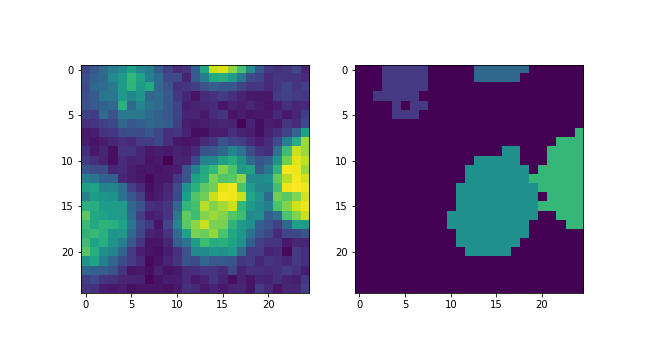

interactive(children=(IntSlider(value=4, description='t', max=9), IntSlider(value=4, description='z', max=9), …

In [19]:
%matplotlib notebook

fig = plt.figure(figsize=[9,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1)

def f(t,z):    
    pic1 = ax1.imshow(cropped_dat_mcherry[t,z,...])
    #plt.colorbar(pic1, ax=ax1)
    #ax1.title('Raw')
    
    pic2 = ax2.imshow(mcherry_seg[t,z,...], vmax = np.max(mcherry_seg))
    #plt.colorbar(pic2, ax=ax2)
    #ax2.title('Segmentation')
    plt.show()
    
    
tlim = (0,cropped_dat_mcherry.shape[0]-1)
zlim = (0,cropped_dat_mcherry.shape[1])
interact(f, t=tlim, z=zlim);

In [258]:
cropped_dat_mcherry

array([[[[ 21.,  18.,  16., ...,  17.,  17.,  19.],
         [ 19.,  21.,  22., ...,  19.,  20.,  17.],
         [ 24.,  23.,  24., ...,  23.,  22.,  18.],
         ...,
         [ 22.,  23.,  23., ...,  33.,  27.,  24.],
         [ 23.,  20.,  20., ...,  24.,  27.,  22.],
         [ 21.,  24.,  21., ...,  22.,  27.,  25.]],

        [[ 22.,  21.,  20., ...,  26.,  19.,  18.],
         [ 31.,  34.,  33., ...,  31.,  29.,  20.],
         [ 50.,  54.,  50., ...,  35.,  33.,  20.],
         ...,
         [ 31.,  32.,  27., ...,  32.,  27.,  27.],
         [ 34.,  36.,  26., ...,  25.,  22.,  26.],
         [ 31.,  30.,  34., ...,  24.,  21.,  22.]],

        [[ 28.,  28.,  29., ...,  36.,  22.,  22.],
         [ 38.,  42.,  36., ...,  42.,  29.,  20.],
         [ 51.,  48.,  45., ...,  46.,  29.,  22.],
         ...,
         [ 45.,  49.,  35., ...,  24.,  27.,  25.],
         [ 48.,  48.,  39., ...,  23.,  24.,  23.],
         [ 51.,  41.,  40., ...,  21.,  22.,  22.]],

        ...,

  

## Other attempt: better object separation BEFORE distance operation

In [99]:
img = cropped_dat_mcherry[6,3,...]

In [100]:
img2 = morphology.opening(img)
img2 = morphology.opening(img2)
img2 = morphology.opening(img2)


Text(0.5, 1.0, 'After opening')

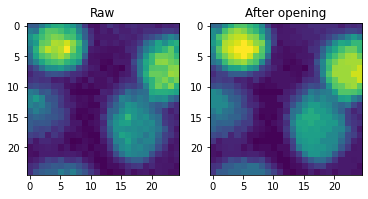

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
plt.title('Raw')
ax2 = fig.add_subplot(122)
ax2.imshow(img2)
plt.title('After opening')

In [102]:
img = img2


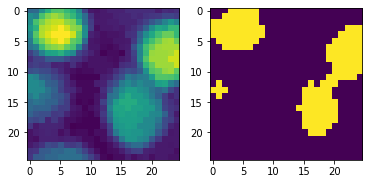

In [127]:
thresh = filters.threshold_otsu(img)

# Try a local threshold
#block_size = 35
#thresh = filters.threshold_local(img, block_size, offset=10)
cells = img > thresh
cells = morphology.binary_erosion(cells)
#cells = morphology.binary_erosion(cells)
cells = morphology.binary_opening(cells)

#print(thresh)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(cells)

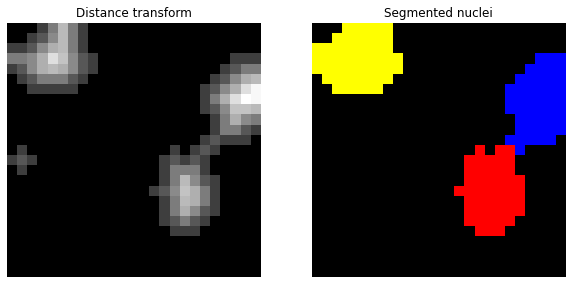

In [128]:
distance = ndi.distance_transform_edt(cells)

local_maxi = feature.peak_local_max(distance, indices=False,
                                    min_distance=2)

#markers = measure.label(local_maxi)

opt = dict(max_sigma=4, min_sigma=1.5, num_sigma=10, exclude_border=0, threshold=0.0, overlap=0.25)
blobs = feature.blob_log(img, **opt)
# Convert list of centers to mask; ignore radius
markers = np.zeros_like(img)
for i, xyzr in enumerate(blobs):
    x,y,r = xyzr.astype('uint8')
    markers[x,y] = i

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(distance, cmap='gray')
ax[0].set_title('Distance transform')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()

## Try watershed on edges instead

In [148]:
img = cropped_dat_mcherry[6,3,...]

In [158]:

thresh = filters.threshold_otsu(img)
cells = img > thresh

edges = ndi.gaussian_gradient_magnitude(img, sigma=1)
#edges = filters.sobel(img, morphology.binary_dilation(cells))

Text(0.5, 1.0, 'Gradient')

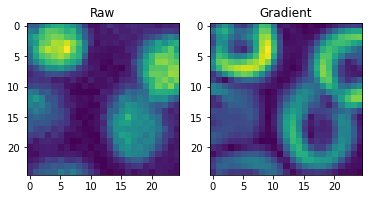

In [159]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
plt.title('Raw')
ax2 = fig.add_subplot(122)
ax2.imshow(edges)
plt.title('Gradient')

In [160]:
opt = dict(max_sigma=4, min_sigma=1.5, num_sigma=10, exclude_border=0, threshold=0.0, overlap=0.25)
blobs = feature.blob_log(img, **opt)
# Convert list of centers to mask; ignore radius
markers = np.zeros_like(img)
for i, xyzr in enumerate(blobs):
    x,y,r = xyzr.astype('uint8')
    markers[x,y] = i

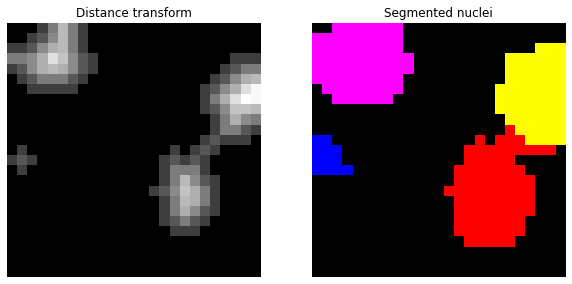

In [161]:
segmented_cells = segmentation.watershed(edges, markers, mask=cells)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(distance, cmap='gray')
ax[0].set_title('Distance transform')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()